Sources: https://www.kaggle.com/datasets/jilkothari/finance-accounting-courses-udemy-13k-course

# Table of contents
0. [Import libraries](#0.-Import-libraries)
1. [Data loading & cleaning](#1.-Data-loading-&-cleaning)
2. [Descriptive Analysis](#2.-Descriptive-Analysis)

---

## 0. Import libraries

##### [Table of content](#Table-of-contents)

In [141]:
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

---

## 1. Data loading & cleaning

##### [Table of content](#Table-of-contents)

In [102]:
df = pd.read_csv('C:\\Users\\Dinh Khoi\\1. jupyter notebook\\Portfolio\\udemy_output_All_Finance__Accounting_p1_p626.csv')
df.head(3)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


### 1.1 Initial checking 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [119]:
df['published_time'] = pd.to_datetime(df['published_time'])

### 1.2 Review duplicated courses

In [104]:
# Duplicated id

ids = df['id']
df[ids.isin(ids[ids.duplicated()])].sort_values('id')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string


In [105]:
# Duplicated titles

ids = df['title']
df[ids.isin(ids[ids.duplicated()])].sort_values('title')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
11187,3381764,ACI Dealing Certificate,/course/aci-dealing-certificate-practice-test/,True,0,0.00000,0.00000,0.00000,0,False,0,2,2020-07-31T13:02:48Z,2020-08-05T07:37:51Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
11378,2749236,ACI Dealing Certificate,/course/aci-dealing-certificate/,True,5,0.00000,0.00000,0.00000,0,False,0,3,2020-01-09T15:07:16Z,2020-01-09T15:13:13Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
10989,3245276,Accountancy For All,/course/accountancy-for-all/,True,11,5.00000,5.00000,5.00000,1,False,11,0,2020-06-17T16:05:06Z,2020-08-06T09:02:14Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
11751,3404900,Accountancy For All,/course/accountancy-for-all-t/,False,798,4.00000,4.21348,4.21348,3,False,5,0,2020-08-09T07:03:35Z,2020-08-13T07:49:45Z,NaN,NaN,NaN,NaN,NaN,NaN
575,640062,Accounting Made Easy: A Quick Guide to Financi...,/course/accounting-made-easy-a-quick-guide-to-...,True,3372,4.43116,4.36355,4.36355,823,False,17,0,2015-10-14T06:33:08Z,2015-10-26T23:22:09Z,468.0,INR,₹468,6080.0,INR,"₹6,080"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11484,133536,Stock Market Investing for Beginners,/course/the-beginners-guide-to-the-stock-market/,False,259888,4.34928,4.35902,4.35902,23635,False,15,0,2013-12-14T15:04:10Z,2013-12-25T19:53:34Z,NaN,NaN,NaN,NaN,NaN,NaN
13337,1923470,Tesouro Direto do Básico ao Avançado,/course/tesouro-direto-do-basico-ao-avancado/,True,13,0.00000,0.00000,0.00000,0,False,33,0,2018-09-20T15:42:39Z,2018-10-24T14:18:51Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
11805,1178820,Tesouro Direto do Básico ao Avançado,/course/tesouro-direto-passo-a-passo/,True,5410,4.70513,4.68402,4.68402,600,False,51,0,2017-04-12T23:41:54Z,2017-04-25T07:06:14Z,455.0,INR,₹455,7360.0,INR,"₹7,360"
11681,1515138,Understanding Credit Cards,/course/understanding-credit-cards/,False,1664,4.25000,4.17105,4.17105,35,False,11,0,2018-01-18T03:49:20Z,2018-03-08T01:20:11Z,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 Drop unncessary columns and duplicated rows

In [106]:
# Unncessary columns

df.drop(['url', 'is_wishlisted', 'discount_price__currency', 'discount_price__price_string', 'price_detail__currency', 'price_detail__price_string'],
       axis=1, inplace=True
       )

In [107]:
# Duplicated titles and keep courses with higher Number of subscribers 

df = df.sort_values('num_subscribers', ascending=False).drop_duplicates('title').sort_index()
df

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,False,47,0.00000,0.00000,0.00000,0,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN
13604,3467284,Programa de Integridade,False,19,0.00000,0.00000,0.00000,0,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,False,47,0.00000,0.00000,0.00000,0,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN
13606,3211345,Poderoso Investidor,False,48,0.00000,0.00000,0.00000,0,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN


### 1.4 Missing values and fill NaN

<AxesSubplot:>

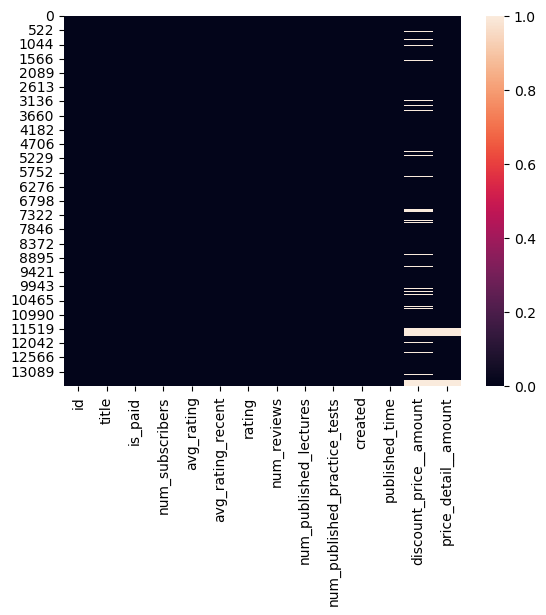

In [108]:
sns.heatmap(df.isnull())

In [109]:
# column discount price amount
dpa_nulls = df['discount_price__amount'].isnull().sum()
percent = dpa_nulls / df.shape[0] * 100

print(dpa_nulls, "out of", df.shape[0], "are nulls:", percent,"%")

1398 out of 13563 are nulls: 10.30745410307454 %


In [110]:
# column price detail amount

pda_nulls = df['price_detail__amount'].isnull().sum()
percent = pda_nulls / df.shape[0] * 100

print(pda_nulls, "out of", df.shape[0], "are nulls:", percent,"%")

495 out of 13563 are nulls: 3.64963503649635 %


In [111]:
## review null rows to test whether these are free courses

df[df['price_detail__amount'].isnull()][ ['id', 'title', 'is_paid', 'price_detail__amount'] ]

,id,title,is_paid,price_detail__amount
11484,133536,Stock Market Investing for Beginners,False,NaN
11485,151668,Introduction to Financial Modeling,False,NaN
11486,1016996,Introduction to Corporate Finance (Mergers & A...,False,NaN
11487,806122,Learn and Master the Basics of Finance,False,NaN
11488,191854,Stock Market Foundations,False,NaN
...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,False,NaN
13604,3467284,Programa de Integridade,False,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,False,NaN
13606,3211345,Poderoso Investidor,False,NaN


In [112]:
## further inspection to review is there any paid course but have missinng price details

df[ (df['is_paid']==True)&(df['price_detail__amount'].isnull())][ ['id', 'title', 'is_paid', 'price_detail__amount'] ]

,id,title,is_paid,price_detail__amount
13607,2935720,Acabou a Previdência e agora? - Volume 03,True,NaN


In [113]:
df.loc[13607]

id                                                                 2935720
title                           Acabou a Previdência e agora? -  Volume 03
is_paid                                                               True
num_subscribers                                                          0
avg_rating                                                             0.0
avg_rating_recent                                                      0.0
rating                                                                 0.0
num_reviews                                                              0
num_published_lectures                                                  14
num_published_practice_tests                                             0
created                                               2020-03-30T19:10:58Z
published_time                                        2020-04-02T16:33:32Z
discount_price__amount                                                 NaN
price_detail__amount     

In [114]:
## With further inspection, I decide to remove this course as it doesn't comply with the initial criterias

df = df.drop(13607)
df.head()

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,8640.0
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,8640.0


<AxesSubplot:>

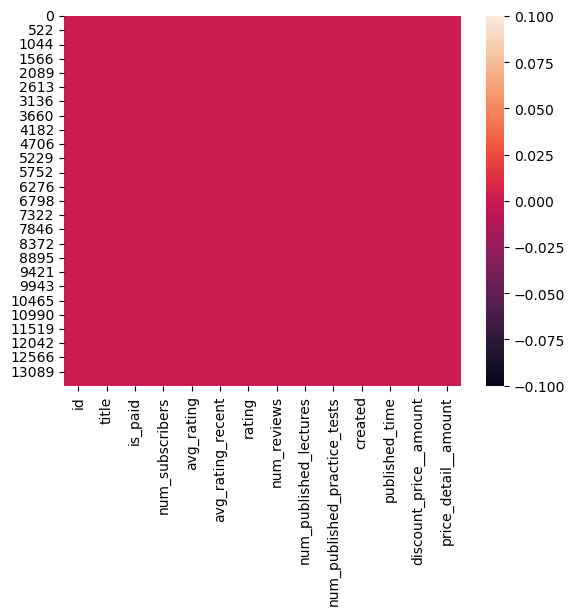

In [115]:
# fill NA with 0 to indicate courses with no price and discount details given

df.fillna(0, inplace=True)
sns.heatmap(df.isnull())

### 1.5 Final output

In [116]:
df.head(3)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,8640.0
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,8640.0
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,8640.0


In [117]:
df.tail(3)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount
13604,3467284,Programa de Integridade,False,19,0.0,0.0,0.0,0,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,0.0,0.0
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,False,47,0.0,0.0,0.0,0,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,0.0,0.0
13606,3211345,Poderoso Investidor,False,48,0.0,0.0,0.0,0,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,0.0,0.0


---

## 2. Descriptive Analysis

##### [Table of content](#Table-of-contents)

### Courses info 

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13562 entries, 0 to 13606
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            13562 non-null  int64              
 1   title                         13562 non-null  object             
 2   is_paid                       13562 non-null  bool               
 3   num_subscribers               13562 non-null  int64              
 4   avg_rating                    13562 non-null  float64            
 5   avg_rating_recent             13562 non-null  float64            
 6   rating                        13562 non-null  float64            
 7   num_reviews                   13562 non-null  int64              
 8   num_published_lectures        13562 non-null  int64              
 9   num_published_practice_tests  13562 non-null  int64              
 10  created                       1356

### Course data overview

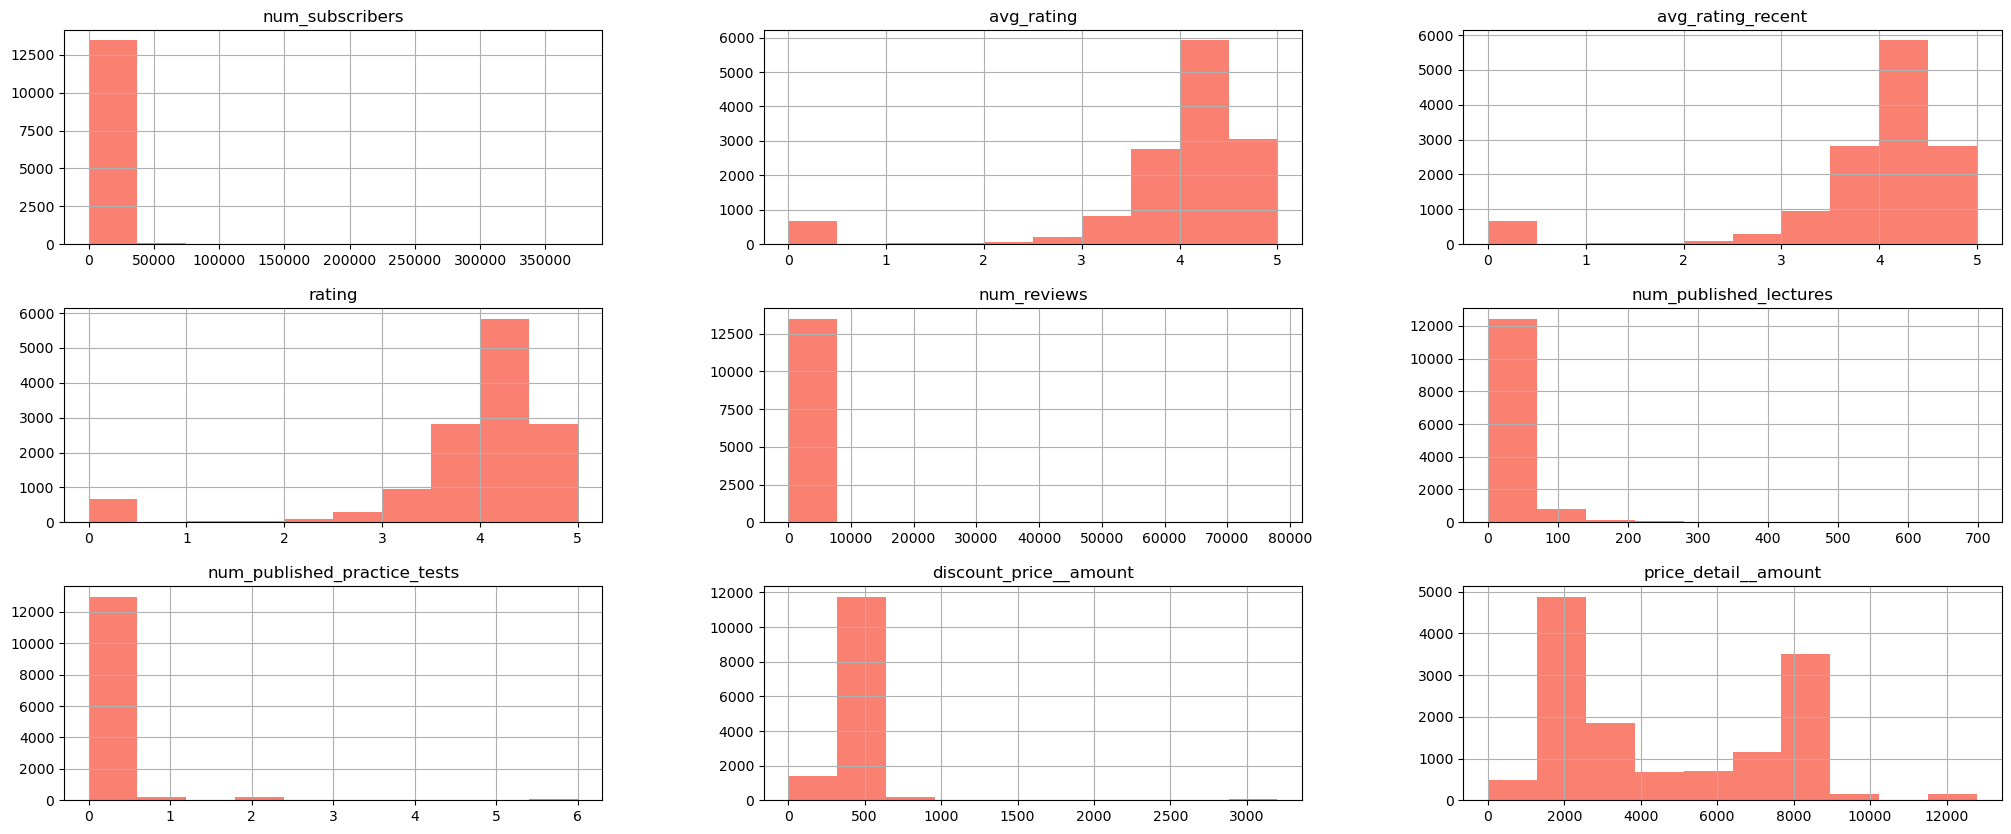

,count,mean,std,min,25%,50%,75%,max
num_subscribers,13562.0,2855.031633,9452.663205,0.0,63.000000,537.000000,2291.500000,374836.0
avg_rating,13562.0,3.926141,1.025935,0.0,3.800000,4.194440,4.450000,5.0
avg_rating_recent,13562.0,3.915068,1.033969,0.0,3.789322,4.182255,4.452095,5.0
rating,13562.0,3.915068,1.033969,0.0,3.789322,4.182255,4.452095,5.0
num_reviews,13562.0,243.918301,1583.590884,0.0,7.000000,24.000000,87.000000,78006.0
num_published_lectures,13562.0,32.232119,42.755076,0.0,12.000000,21.000000,37.000000,699.0
num_published_practice_tests,13562.0,0.109792,0.621940,0.0,0.000000,0.000000,0.000000,6.0
discount_price__amount,13562.0,443.140245,295.120020,0.0,455.000000,455.000000,455.000000,3200.0
price_detail__amount,13562.0,4481.203362,3173.999892,0.0,1280.000000,3200.000000,8640.000000,12800.0


In [132]:
criteria = ['num_subscribers', 'avg_rating', 'avg_rating_recent', 'rating', 'num_reviews', 'num_published_lectures', 'num_published_practice_tests', 'discount_price__amount', 'price_detail__amount']

df.loc[:, criteria].hist(color='salmon', figsize=(25,10))
plt.show()
display(df[criteria].describe().T)

The above plot shows some insights about data distribution :
- Courses tend to have prices between 1280 and 8640 (IQR)
- There is a tendency to leave ratings above 3
- On average, courses have 533 subscribers
- 'num_subscribers', 'num_reviews', 'num_published_lectures', 'discount_price_amount' are sensitive to outliers

### Courses published time

C:\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


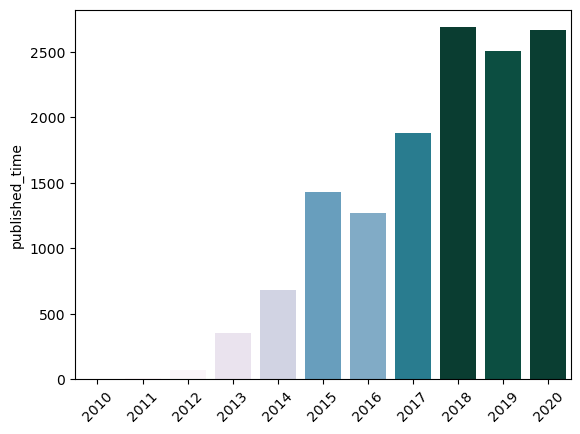

In [180]:
date = pd.DataFrame(df['published_time'].dt.to_period('Y').value_counts())
date = date.sort_index()

colors = [plt.cm.PuBuGn(norm(c)) for c in date['published_time']]

sns.barplot(x=date.index, y= date['published_time'], 
            palette=colors
           )

plt.xticks(rotation=45)
plt.show()

- Most courses are published in 2018 and within the period of 2018-2020

### Courses with the best rating 

In [199]:
# Courses with high price/rating ratio

df['price/rating'] = df['price_detail__amount'] / df['rating']
df[ (df['is_paid']==True)&(df['rating']!=0) ].sort_values('price/rating', ascending=False).head(10)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,price/rating
11064,2735752,Institutional trading of ADR/GDR/Stock arbitra...,True,8,1.00000,1.00000,1.00000,1,8,0,2020-01-03T09:08:06Z,2020-02-04 17:59:29+00:00,455.0,8640.0,8640.000000
10978,2295237,Futures & Options For Monthly Returns,True,15,1.00000,1.00000,1.00000,1,12,0,2019-03-28T09:20:46Z,2019-08-29 22:29:13+00:00,455.0,8640.0,8640.000000
10987,2886666,Data science for algorithmic trading,True,36,1.00000,1.00000,1.00000,1,62,0,2020-03-19T15:46:16Z,2020-04-15 15:15:43+00:00,455.0,8640.0,8640.000000
13086,2695254,Corso di Investimento e Risparmio completo,True,3,1.00000,1.00000,1.00000,1,49,0,2019-12-08T09:42:14Z,2020-07-01 12:31:27+00:00,455.0,8640.0,8640.000000
10881,1533006,Financial Advisor Training: Practice Managemen...,True,16,1.00000,1.00000,1.00000,1,27,0,2018-01-30T17:29:40Z,2018-05-11 01:16:16+00:00,455.0,8640.0,8640.000000
11016,2670732,SAP S/4HANA for Financial Accounting Practice ...,True,535,1.00000,1.00000,1.00000,1,0,4,2019-11-24T11:31:30Z,2019-12-24 18:16:06+00:00,455.0,7360.0,7360.000000
13026,2204920,Corso completo Trading + spiegazioni Bolle + s...,True,1,1.00000,1.00000,1.00000,1,9,0,2019-02-07T20:45:15Z,2019-02-12 13:36:40+00:00,455.0,6400.0,6400.000000
11023,3241944,Blockchain and Cryptocurrency Fundamentals,True,26,1.00000,1.00000,1.00000,1,62,0,2020-06-16T15:20:46Z,2020-07-31 20:35:08+00:00,455.0,6400.0,6400.000000
8314,2268274,Learn Data Analysis using Microsoft Excel Basi...,True,611,1.91667,1.36363,1.36363,6,28,0,2019-03-12T16:56:25Z,2019-03-14 19:07:16+00:00,455.0,8640.0,6336.029568
9368,1240602,ISO 9001:2015 Quality Management System,True,7,3.66667,2.13933,2.13933,3,9,1,2017-06-03T22:29:46Z,2017-06-29 16:04:15+00:00,0.0,12800.0,5983.181650


In [198]:
# Courses with high number of subscribers

df.sort_values('num_subscribers', ascending=False).head(10)

,id,title,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,price_detail__amount,price/rating
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,True,374836,4.47080,4.47173,4.47173,41630,83,0,2015-10-12T06:39:46Z,2016-01-11 21:39:33+00:00,455.0,8640.0,1932.138121
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509,4.66019,4.67874,4.67874,78006,84,0,2016-02-14T22:57:48Z,2016-04-06 05:16:11+00:00,455.0,8640.0,1846.651021
11484,133536,Stock Market Investing for Beginners,False,259888,4.34928,4.35902,4.35902,23635,15,0,2013-12-14T15:04:10Z,2013-12-25 19:53:34+00:00,0.0,0.0,0.000000
3,648826,The Complete Financial Analyst Course 2020,True,245860,4.54407,4.53772,4.53772,46447,338,0,2015-10-23T13:34:35Z,2016-01-21 01:38:48+00:00,455.0,8640.0,1904.039914
19,980086,Deep Learning Prerequisites: The Numpy Stack i...,True,239309,4.47381,4.54005,4.54005,18322,47,0,2016-10-10T06:34:58Z,2016-10-12 16:51:08+00:00,455.0,1280.0,281.935221
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070,4.58956,4.60015,4.60015,54581,78,0,2016-08-22T12:10:18Z,2016-08-23 16:59:49+00:00,455.0,8640.0,1878.199624
15,1202988,The Complete Financial Analyst Training & Inve...,True,182002,4.49571,4.49507,4.49507,21421,225,0,2017-05-03T17:04:31Z,2017-08-17 17:53:15+00:00,455.0,8640.0,1922.105774
35,1098006,The Complete Presentation and Public Speaking/...,True,158654,4.46745,4.44446,4.44446,10288,206,0,2017-01-31T21:07:05Z,2017-05-02 05:34:33+00:00,540.0,10240.0,2303.991936
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282,4.59491,4.59326,4.59326,52653,292,2,2017-09-26T16:32:48Z,2017-11-14 23:58:14+00:00,455.0,8640.0,1881.016968
22,888716,"Introduction to Finance, Accounting, Modeling ...",True,140676,4.47580,4.46916,4.46916,17013,61,0,2016-06-26T14:37:28Z,2016-06-28 06:12:23+00:00,500.0,9280.0,2076.452846
